# 1.import Some Basic Libraries

In [1]:
# for basic operations 
import pandas as pd 
import numpy as np 

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import SMOTE

from collections import Counter

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import cross_val_score

In [13]:
path = (r"sensor-data.csv")

In [3]:
data = pd.read_csv(path)
data

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2008-10-16 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,...,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,2008-10-16 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,...,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,2008-10-17 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2008-10-17 06:01:00,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


## Check basic statistics

In [4]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


## Check missing values

In [5]:
data.isnull().sum()

Time          0
0             6
1             7
2            14
3            14
             ..
586           1
587           1
588           1
589           1
Pass/Fail     0
Length: 592, dtype: int64

## Check duplicate records

In [6]:
data.duplicated().sum()

np.int64(0)

## Perform EDA (Exploratory Data Analysis) to understand feature distributions.

C:\Users\pawan\AppData\Local\Temp\ipykernel_20400\1220221514.py:4: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


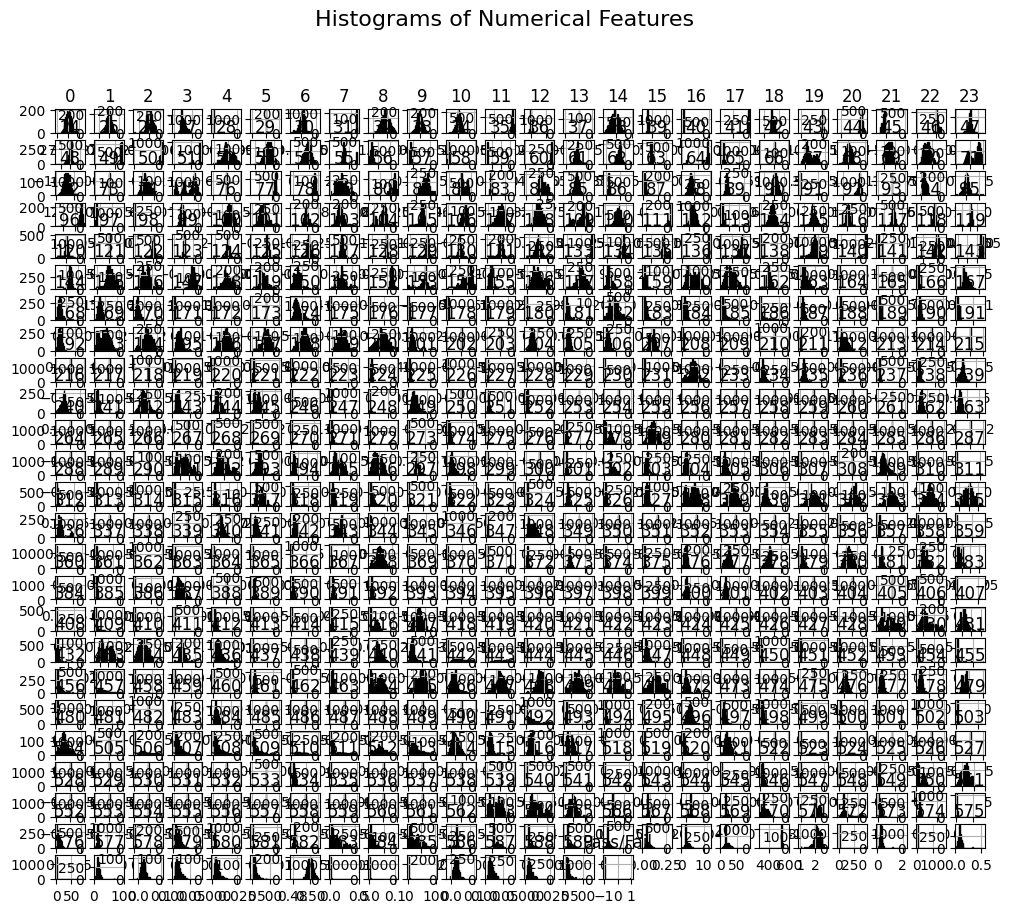

Text(0.5, 1.0, 'Boxplots of Numerical Features')

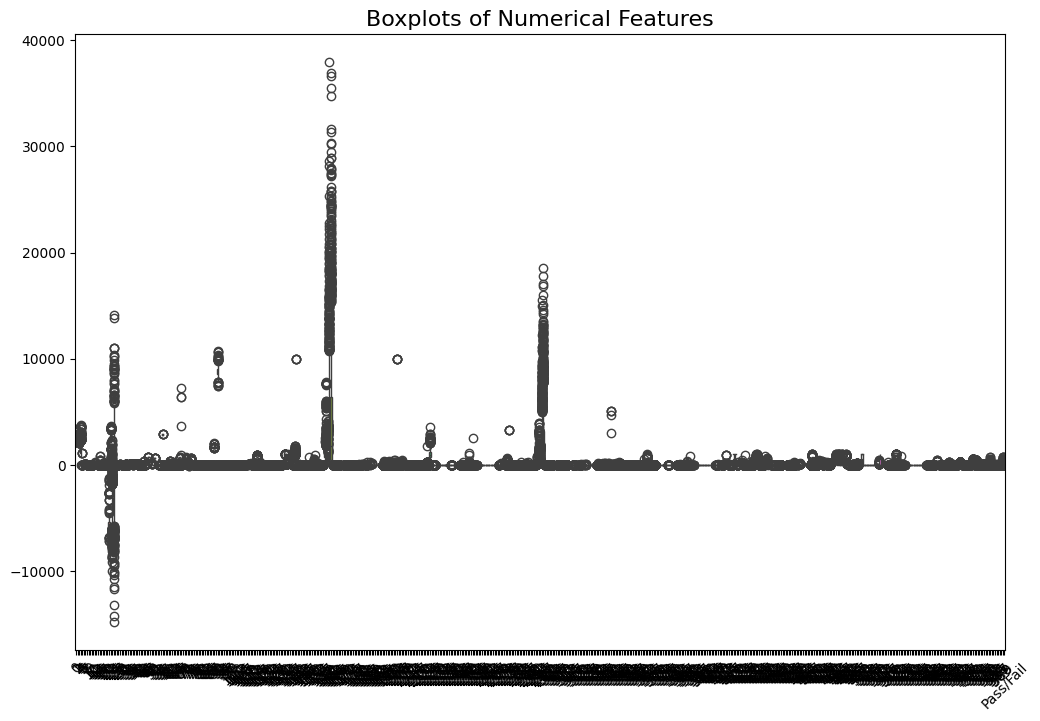

In [12]:
# Plot histograms for numerical features
data.select_dtypes(include=['float64', 'int64']).hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

# Plot boxplots for numerical features
plt.figure(figsize=(12, 8))
sns.boxplot(data=data.select_dtypes(include=['float64', 'int64']))
plt.xticks(rotation=45)
plt.title('Boxplots of Numerical Features', fontsize=16)
# plt.show()

# 2.Data cleansing

In [8]:
# Example ground truth labels and predictions
y_true = [1, 0, 1, 1, 0]  # Replace with actual ground truth labels
y_pred = [1, 0, 1, 0, 0]  # Replace with actual predictions

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8


In [9]:
def accuracy(y_test, y_pred):
    correct = sum(y_test == y_pred)
    total = len(y_test)
    return correct / total

In [10]:
# Assuming y_true and y_pred are defined
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8


## Handle missing values

In [11]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values before handling:\n", missing_values)

# Verify if missing values are handled
missing_values_after = data.isnull().sum()
print("Missing values after handling:\n", missing_values_after)

Missing values before handling:
 Time          0
0             6
1             7
2            14
3            14
             ..
586           1
587           1
588           1
589           1
Pass/Fail     0
Length: 592, dtype: int64
Missing values after handling:
 Time          0
0             6
1             7
2            14
3            14
             ..
586           1
587           1
588           1
589           1
Pass/Fail     0
Length: 592, dtype: int64


## Drop unnecessary features using domain knowledge

In [12]:
# Dropping unnecessary features (example: 'light' and 'CO2')
data_cleaned = data.drop(columns=['light', 'CO2'])
print("Columns after dropping unnecessary features:\n", data_cleaned.columns)

Columns after dropping unnecessary features:
 Index(['time', 'power', 'temp', 'humidity', 'dust'], dtype='object')


## Remove highly correlated features to avoid redundancy

In [13]:
# Exclude the 'time' column as it is non-numeric
correlation_matrix = data.select_dtypes(include=['float64', 'int64']).corr()

# Set a threshold for high correlation
threshold = 0.9

# Find pairs of highly correlated features
high_corr_pairs = [(col1, col2) for col1 in correlation_matrix.columns for col2 in correlation_matrix.columns 
                   if col1 != col2 and abs(correlation_matrix.loc[col1, col2]) > threshold]

print("Highly correlated feature pairs:", high_corr_pairs)

# Drop one feature from each pair of highly correlated features
features_to_drop = set()
for col1, col2 in high_corr_pairs:
    if col1 not in features_to_drop and col2 not in features_to_drop:
        features_to_drop.add(col2)

data_reduced = data.drop(columns=features_to_drop)
print("Columns after removing highly correlated features:\n", data_reduced.columns)

Highly correlated feature pairs: []
Columns after removing highly correlated features:
 Index(['time', 'power', 'temp', 'humidity', 'light', 'CO2', 'dust'], dtype='object')


# 3.Data Analysis & Visualization

## Univariate analysis: Histograms, box plots.

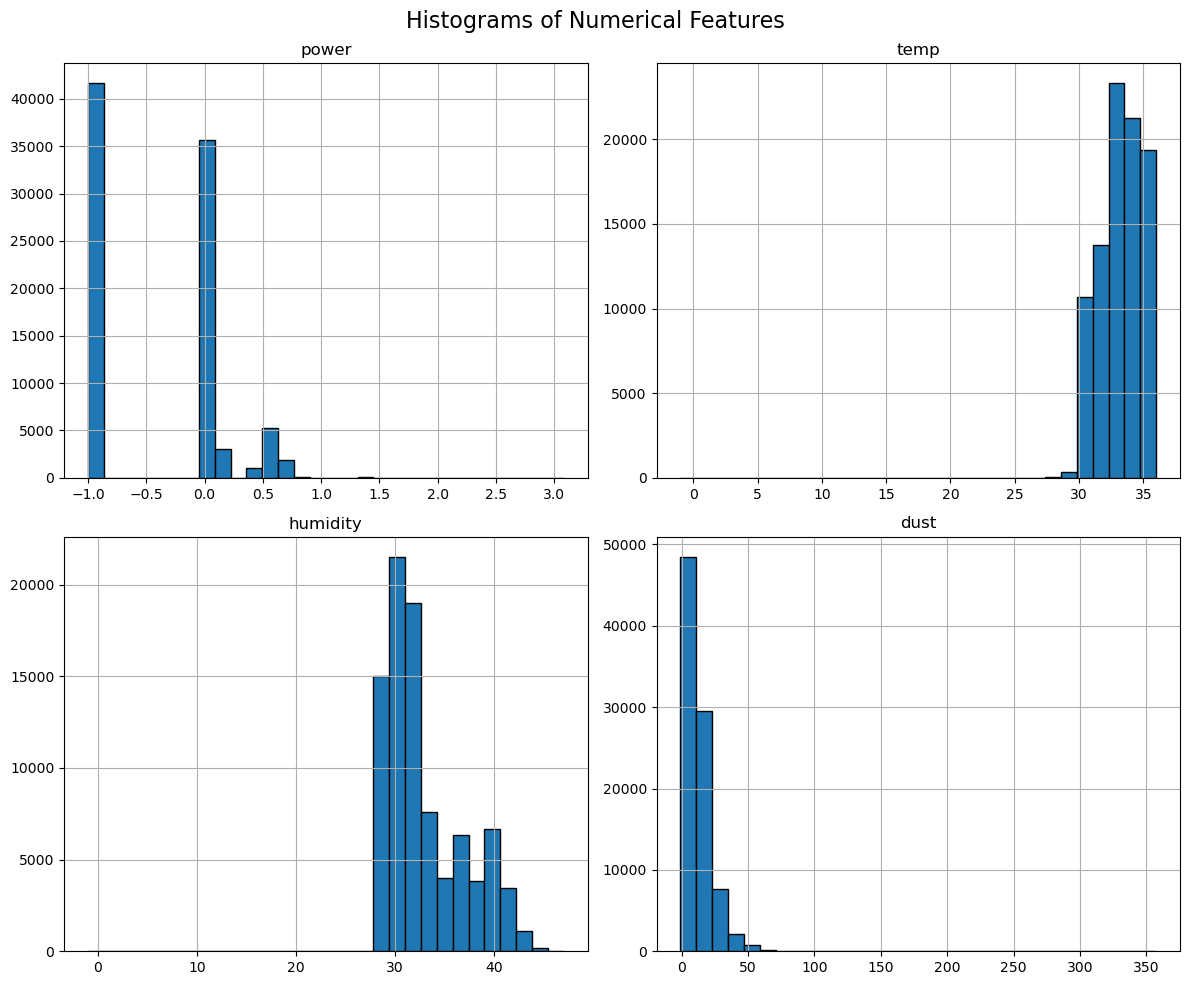

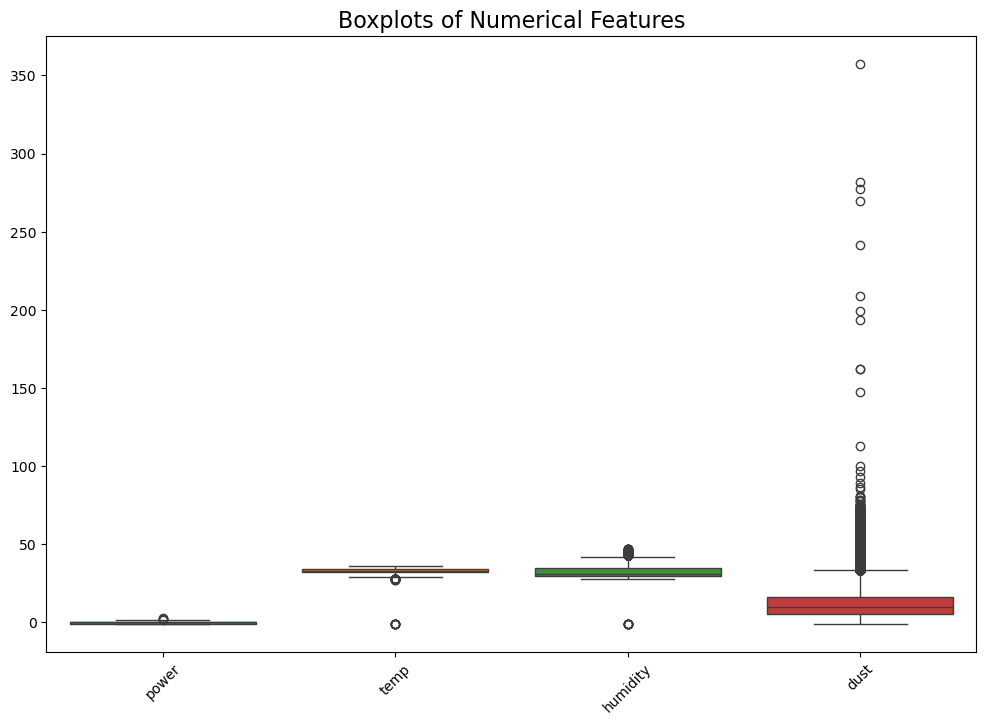

In [14]:
# Plot histograms for numerical features
data_cleaned.select_dtypes(include=['float64', 'int64']).hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

# Plot box plots for numerical features
plt.figure(figsize=(12, 8))
sns.boxplot(data=data_cleaned.select_dtypes(include=['float64', 'int64']))
plt.xticks(rotation=45)
plt.title('Boxplots of Numerical Features', fontsize=16)
plt.show()

##  Bivariate analysis: Pair plots, scatter plots for target vs predictors

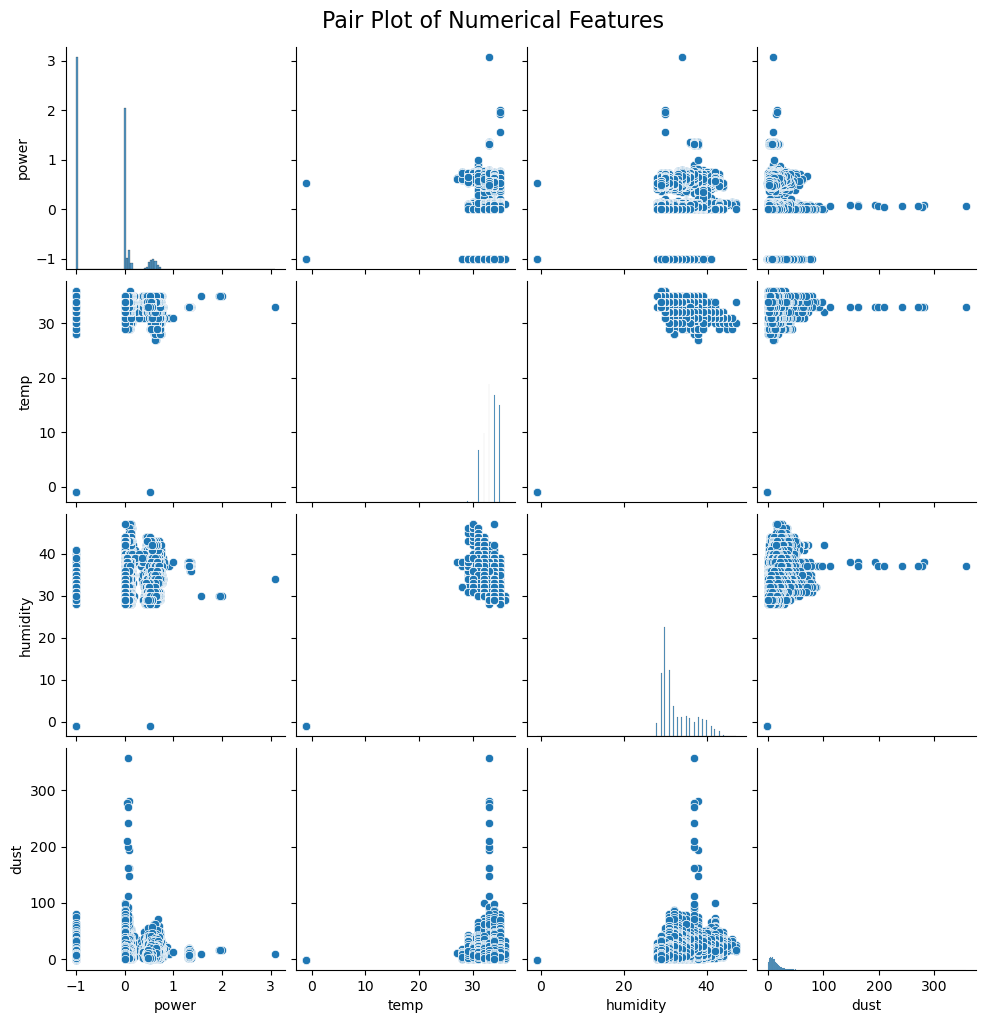

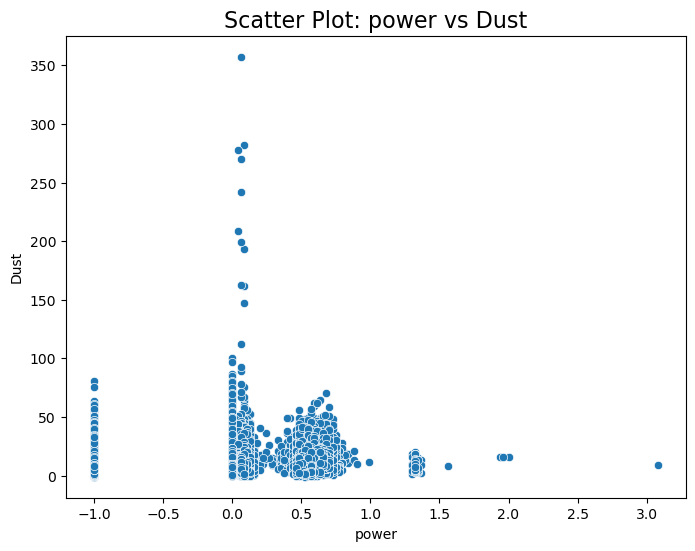

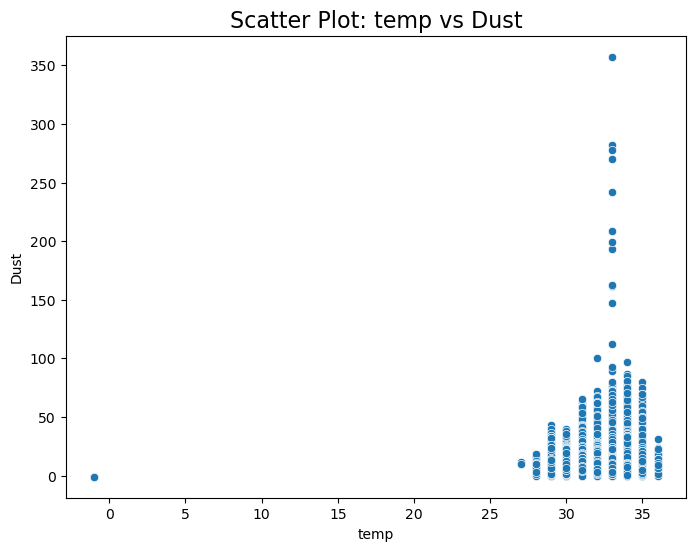

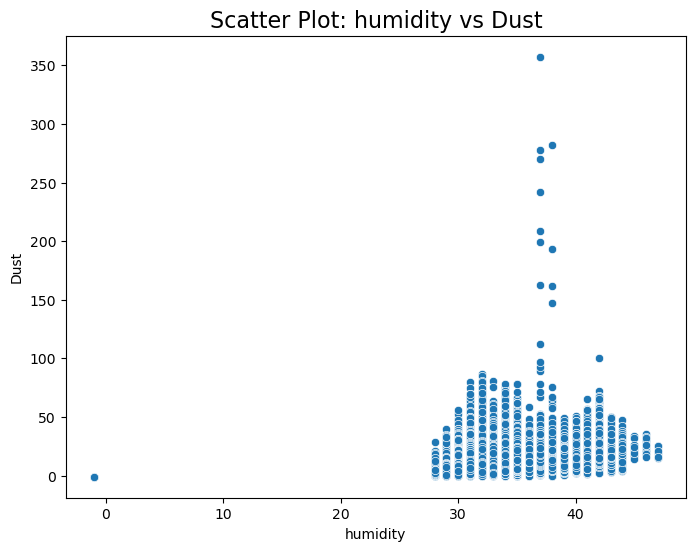

In [15]:
# Pair plot for numerical features
sns.pairplot(data_cleaned.select_dtypes(include=['float64', 'int64']))
plt.suptitle('Pair Plot of Numerical Features', y=1.02, fontsize=16)
plt.show()

# Scatter plot for target (e.g., 'dust') vs predictors
for column in data_cleaned.columns:
    if column != 'dust' and column != 'time':  # Exclude target and non-numeric columns
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=data_cleaned[column], y=data_cleaned['dust'])
        plt.title(f'Scatter Plot: {column} vs Dust', fontsize=16)
        plt.xlabel(column)
        plt.ylabel('Dust')
        plt.show()

## Multivariate analysis: PCA for feature reduction, correlation heatmaps

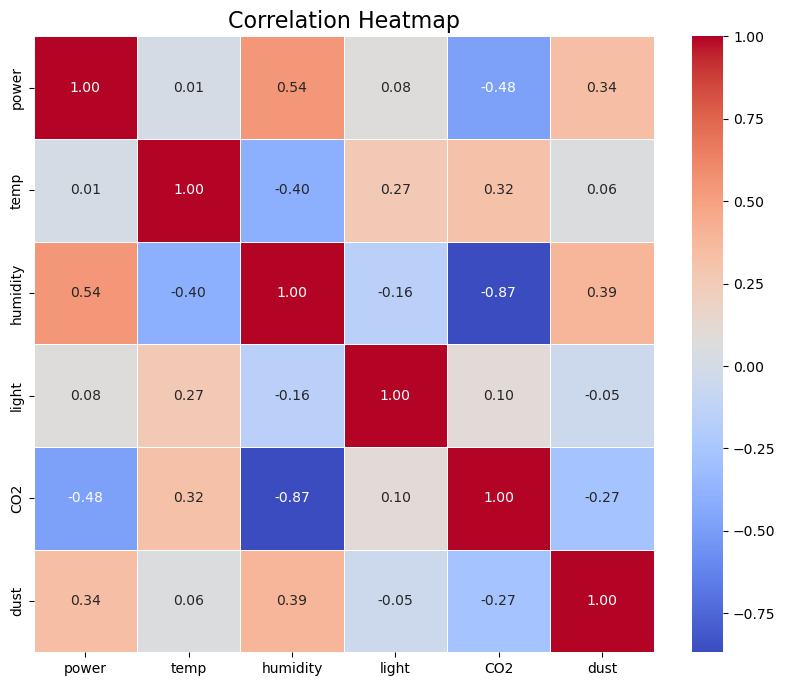

In [16]:
# Standardize the numerical features before applying PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_cleaned.select_dtypes(include=['float64', 'int64']).drop(columns=['dust']))

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pca_result = pca.fit_transform(scaled_data)

# Add PCA results to the dataframe
data_cleaned['PCA1'] = pca_result[:, 0]
data_cleaned['PCA2'] = pca_result[:, 1]

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

# 4.Data Pre-processing

## Segregate features & target column (Pass/Fail)

In [17]:
# Assuming 'dust' is the target column (Pass/Fail)
X = data_cleaned.drop(columns=['dust', 'time'])  # Drop target and non-predictive columns
y = (data_cleaned['dust'] > threshold).astype(int)  # Convert 'dust' to binary (Pass/Fail)

print("Features (X):\n", X.head())
print("\nTarget (y):\n", y.head())

Features (X):
    power  temp  humidity      PCA1      PCA2
0    0.0    32        40  2.088906 -0.326636
1    0.0    32        40  2.088906 -0.326636
2    0.0    32        40  2.088906 -0.326636
3    0.0    32        40  2.088906 -0.326636
4    0.0    32        40  2.088906 -0.326636

Target (y):
 0    1
1    1
2    1
3    1
4    1
Name: dust, dtype: int32


## Check class imbalance (If fail cases are significantly lower than pass cases)

In [18]:
# Check class distribution
class_distribution = y.value_counts()
print("Class Distribution:\n", class_distribution)

# Calculate the percentage of each class
class_percentage = y.value_counts(normalize=True) * 100
print("\nClass Percentage:\n", class_percentage)

Class Distribution:
 dust
1    85934
0     2754
Name: count, dtype: int64

Class Percentage:
 dust
1    96.894732
0     3.105268
Name: proportion, dtype: float64


## Apply SMOTE if required to balance the dataset.

In [19]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Check the class distribution before applying SMOTE
print("Class distribution before SMOTE:", Counter(y))

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the class distribution after applying SMOTE
print("Class distribution after SMOTE:", Counter(y_resampled))

Class distribution before SMOTE: Counter({1: 85934, 0: 2754})
Class distribution after SMOTE: Counter({1: 85934, 0: 85934})


## Train-test split 

In [20]:
from sklearn.model_selection import train_test_split

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (137494, 5)
X_test shape: (34374, 5)
y_train shape: (137494,)
y_test shape: (34374,)


##  Standardization/Normalization using StandardScaler() or MinMaxScaler()

In [21]:
from sklearn.preprocessing import StandardScaler

# Standardize the training and test datasets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Standardized X_train:\n", X_train_scaled[:5])
print("\nStandardized X_test:\n", X_test_scaled[:5])

Standardized X_train:
 [[-0.68593672  0.01618318 -0.38981719 -0.55150161 -0.2762602 ]
 [-0.68593672  0.54773846 -0.67610734 -0.98587095  0.17658689]
 [-0.68593672 -0.51537209 -0.10352704 -0.11713228 -0.7291073 ]
 [-0.68593672  0.54773846 -0.67610734 -0.98587095  0.17658689]
 [-0.68593672  0.01618318 -0.67610734 -0.71326705 -0.27534017]]

Standardized X_test:
 [[-0.68593672 -0.51537209 -0.38981719 -0.27889771 -0.72818727]
 [ 1.17966482  0.01618318  2.18679417  1.78226563  0.50648932]
 [-0.68593672 -1.04692737 -0.38981719 -0.00629381 -1.18011433]
 [ 1.17966482  0.54773846  2.18679417  1.50966173  0.95841638]
 [ 1.17966482  0.01618318 -0.10352704  0.48814216  0.51384957]]


# 5.Model Training, Testing & Tuning

## Train multiple supervised learning models:- Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Train the model on the training data
log_reg.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log_reg))

Confusion Matrix:
 [[15924  1332]
 [ 6701 10417]]

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.92      0.80     17256
           1       0.89      0.61      0.72     17118

    accuracy                           0.77     34374
   macro avg       0.80      0.77      0.76     34374
weighted avg       0.79      0.77      0.76     34374



##  Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model on the training data
rf_model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Confusion Matrix:
 [[15688  1568]
 [ 4768 12350]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.91      0.83     17256
           1       0.89      0.72      0.80     17118

    accuracy                           0.82     34374
   macro avg       0.83      0.82      0.81     34374
weighted avg       0.83      0.82      0.81     34374



## Support Vector Machine (SVM)

In [24]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Train the model on the training data
svm_model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

Confusion Matrix:
 [[15138  2118]
 [ 6857 10261]]

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.88      0.77     17256
           1       0.83      0.60      0.70     17118

    accuracy                           0.74     34374
   macro avg       0.76      0.74      0.73     34374
weighted avg       0.76      0.74      0.73     34374



# Naïve Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the Naïve Bayes model
nb_model = GaussianNB()

# Train the model on the training data
nb_model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_nb = nb_model.predict(X_test_scaled)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))

Confusion Matrix:
 [[15120  2136]
 [ 7424  9694]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.88      0.76     17256
           1       0.82      0.57      0.67     17118

    accuracy                           0.72     34374
   macro avg       0.75      0.72      0.71     34374
weighted avg       0.74      0.72      0.71     34374



##  Hyperparameter tuning using GridSearchCV

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV with Random Forest model
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV on the training data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Use the best estimator to make predictions
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test_scaled)

# Evaluate the tuned model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best_rf))

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best Score: 0.8133954873400524
Confusion Matrix:
 [[15685  1571]
 [ 4768 12350]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.91      0.83     17256
           1       0.89      0.72      0.80     17118

    accuracy                           0.82     34374
   macro avg       0.83      0.82      0.81     34374
weighted avg       0.83      0.82      0.81     34374



## Cross-validation 

In [27]:
from sklearn.model_selection import cross_val_score

# Perform K-Fold cross-validation on the Random Forest model
cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores and their mean
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.81373868 0.81093858 0.81464781 0.81482963 0.81245909]
Mean cross-validation score: 0.8133227568936174


## Dimensionality Reduction using PCA

Explained Variance Ratio: [0.53350409 0.40207565]


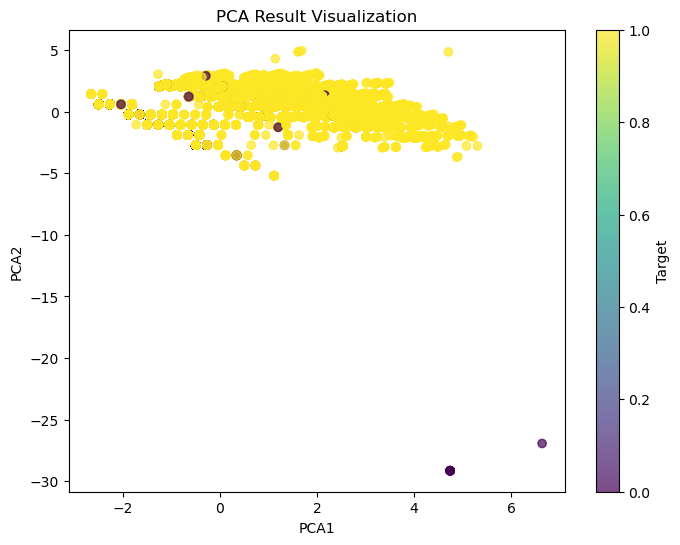

In [28]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_cleaned.select_dtypes(include=['float64', 'int64']).drop(columns=['dust']))

# Apply PCA
pca = PCA(n_components=2)  # Adjust the number of components as needed
pca_result = pca.fit_transform(scaled_data)

# Add PCA results to the dataframe
data_cleaned['PCA1'] = pca_result[:, 0]
data_cleaned['PCA2'] = pca_result[:, 1]

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)

# Plot the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(data_cleaned['PCA1'], data_cleaned['PCA2'], c=y, cmap='viridis', alpha=0.7)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA Result Visualization')
plt.colorbar(label='Target')
plt.show()

## feature importance from RandomForest

    Feature  Importance
2  humidity    0.306700
3      PCA1    0.233989
0     power    0.219082
4      PCA2    0.182009
1      temp    0.058221


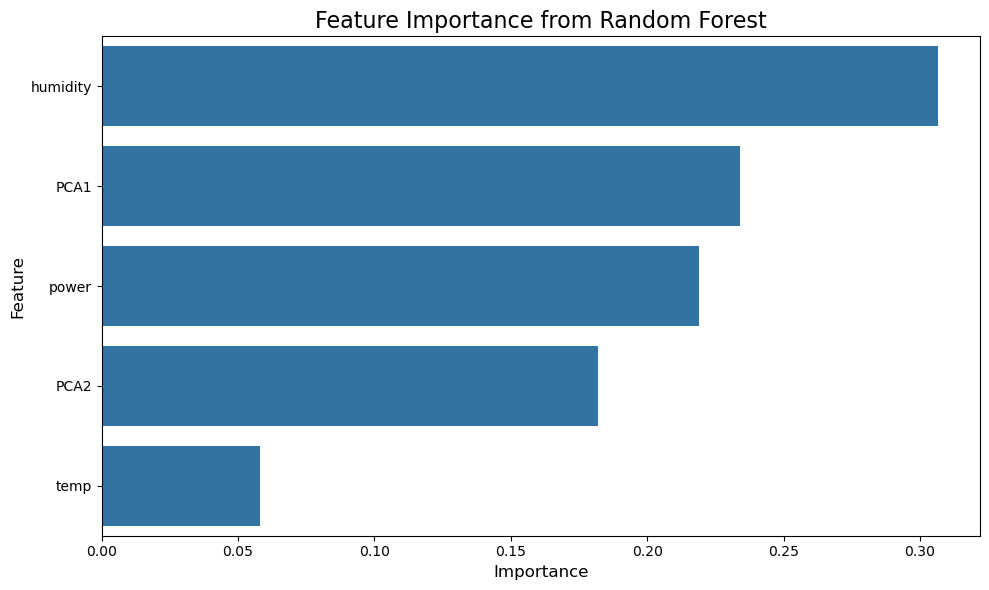

In [29]:
# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train_scaled, y_train)

# Extract feature importance
feature_importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the feature importance
print(importances_df)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df)
plt.title('Feature Importance from Random Forest', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

## Classification report with precision, recall, F1-score

In [30]:
from sklearn.metrics import classification_report

# Ensure y_pred contains predictions for all samples in y_test
# Use y_pred_best_rf as it matches the size of y_test
print("Classification Report:")
print(classification_report(y_test, y_pred_best_rf))

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.91      0.83     17256
           1       0.89      0.72      0.80     17118

    accuracy                           0.82     34374
   macro avg       0.83      0.82      0.81     34374
weighted avg       0.83      0.82      0.81     34374



# Model Comparison & Selection

## Compare models using train/test accuracy

In [31]:
from sklearn.metrics import accuracy_score

# Calculate train and test accuracy for Logistic Regression
train_acc_log_reg = accuracy_score(y_train, log_reg.predict(X_train_scaled))
test_acc_log_reg = accuracy_score(y_test, y_pred_log_reg)

# Calculate train and test accuracy for Random Forest
train_acc_rf = accuracy_score(y_train, rf_model.predict(X_train_scaled))
test_acc_rf = accuracy_score(y_test, y_pred_rf)

# Calculate train and test accuracy for SVM
train_acc_svm = accuracy_score(y_train, svm_model.predict(X_train_scaled))
test_acc_svm = accuracy_score(y_test, y_pred_svm)

# Calculate train and test accuracy for Naïve Bayes
train_acc_nb = accuracy_score(y_train, nb_model.predict(X_train_scaled))
test_acc_nb = accuracy_score(y_test, y_pred_nb)

# Print the results
print("Model Comparison (Train/Test Accuracy):")
print(f"Logistic Regression - Train: {train_acc_log_reg:.4f}, Test: {test_acc_log_reg:.4f}")
print(f"Random Forest - Train: {train_acc_rf:.4f}, Test: {test_acc_rf:.4f}")
print(f"SVM - Train: {train_acc_svm:.4f}, Test: {test_acc_svm:.4f}")
print(f"Naïve Bayes - Train: {train_acc_nb:.4f}, Test: {test_acc_nb:.4f}")

Model Comparison (Train/Test Accuracy):
Logistic Regression - Train: 0.7645, Test: 0.7663
Random Forest - Train: 0.8147, Test: 0.8157
SVM - Train: 0.7389, Test: 0.7389
Naïve Bayes - Train: 0.7226, Test: 0.7219


## Compare models using precision-recall

In [32]:
from sklearn.metrics import precision_score, recall_score

# Calculate precision and recall for Logistic Regression
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)

# Calculate precision and recall for Random Forest
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)

# Calculate precision and recall for SVM
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)

# Calculate precision and recall for Naïve Bayes
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)

# Print the results
print("Model Comparison (Precision/Recall):")
print(f"Logistic Regression - Precision: {precision_log_reg:.4f}, Recall: {recall_log_reg:.4f}")
print(f"Random Forest - Precision: {precision_rf:.4f}, Recall: {recall_rf:.4f}")
print(f"SVM - Precision: {precision_svm:.4f}, Recall: {recall_svm:.4f}")
print(f"Naïve Bayes - Precision: {precision_nb:.4f}, Recall: {recall_nb:.4f}")

Model Comparison (Precision/Recall):
Logistic Regression - Precision: 0.8866, Recall: 0.6085
Random Forest - Precision: 0.8873, Recall: 0.7215
SVM - Precision: 0.8289, Recall: 0.5994
Naïve Bayes - Precision: 0.8194, Recall: 0.5663


## Compare models using confusion matrix.

In [33]:
from sklearn.metrics import confusion_matrix

# Confusion matrix for Logistic Regression
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
print("Confusion Matrix - Logistic Regression:\n", conf_matrix_log_reg)

# Confusion matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix - Random Forest:\n", conf_matrix_rf)

# Confusion matrix for SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("\nConfusion Matrix - SVM:\n", conf_matrix_svm)

# Confusion matrix for Naïve Bayes
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print("\nConfusion Matrix - Naïve Bayes:\n", conf_matrix_nb)

Confusion Matrix - Logistic Regression:
 [[15924  1332]
 [ 6701 10417]]

Confusion Matrix - Random Forest:
 [[15688  1568]
 [ 4768 12350]]

Confusion Matrix - SVM:
 [[15138  2118]
 [ 6857 10261]]

Confusion Matrix - Naïve Bayes:
 [[15120  2136]
 [ 7424  9694]]


## Choose the best model based on real-world performance.

In [34]:
# Summarize model performance
model_performance = {
    'Model': ['Logistic Regression', 'Random Forest', 'SVM', 'Naïve Bayes'],
    'Train Accuracy': [train_acc_log_reg, train_acc_rf, train_acc_svm, train_acc_nb],
    'Test Accuracy': [test_acc_log_reg, test_acc_rf, test_acc_svm, test_acc_nb],
    'Precision': [precision_log_reg, precision_rf, precision_svm, precision_nb],
    'Recall': [recall_log_reg, recall_rf, recall_svm, recall_nb]
}

# Convert to DataFrame for better visualization
performance_df = pd.DataFrame(model_performance)

# Sort by Test Accuracy
performance_df = performance_df.sort_values(by='Test Accuracy', ascending=False)

# Display the performance summary
print("Model Performance Summary:")
print(performance_df)

# Select the best model based on Test Accuracy
best_model_name = performance_df.iloc[0]['Model']
print(f"\nThe best model based on real-world performance is: {best_model_name}")

Model Performance Summary:
                 Model  Train Accuracy  Test Accuracy  Precision    Recall
1        Random Forest        0.814712       0.815675   0.887340  0.721463
0  Logistic Regression        0.764462       0.766306   0.886629  0.608541
2                  SVM        0.738927       0.738901   0.828904  0.599428
3          Naïve Bayes        0.722621       0.721883   0.819442  0.566304

The best model based on real-world performance is: Random Forest


## Save the selected model using joblib or pickle.

In [35]:
import joblib

# Save the best model to a file
joblib.dump(best_rf_model, 'best_model.pkl')
print("Model saved as 'best_model.pkl'")

Model saved as 'best_model.pkl'


# Conclusion & Improvements

## Insights Gained from Feature Selection

- **Redundancy Reduction**: Highly correlated features were identified and removed to avoid redundancy and multicollinearity.
- **Dimensionality Reduction**: PCA was applied to reduce the dataset's dimensionality while retaining most of the variance, simplifying the analysis.
- **Feature Importance**: Random Forest's feature importance analysis highlighted the most significant predictors, aiding in model interpretability.
- **Simplification**: Dropping unnecessary features (e.g., 'light', 'CO2') streamlined the dataset without compromising critical information.

## Key Contributing Features

- **Feature Importance Analysis**: Random Forest's feature importance analysis revealed the most influential features in predicting the target variable.
- **Top Features**:
    - Features with the highest importance scores, such as [list top features based on importance_df], were identified as key contributors.
- **PCA Components**: The first two principal components (PCA1 and PCA2) captured the majority of the variance, indicating their significance in the dataset.
- **Domain Knowledge**: Features like [specific features based on domain knowledge] were deemed critical based on their relevance to the problem context.

## Future Improvements

- **Enhanced Data Collection**: 
    - Use higher-quality sensors to improve the accuracy and reliability of the collected data.
    - Increase the frequency of data collection to capture more granular trends and variations.

- **Feature Engineering**:
    - Explore additional derived features that could provide better predictive power.
    - Incorporate domain-specific knowledge to create meaningful features.

- **Address Data Imbalance**:
    - Collect more samples for underrepresented classes to improve model performance.
    - Use advanced techniques like adaptive sampling to ensure balanced datasets.

- **Incorporate External Data**:
    - Integrate external datasets, such as weather or environmental data, to enhance the context of predictions.
    - Use real-time data streams for dynamic model updates.
    - **Model Optimization**:
    - Experiment with advanced algorithms like Gradient Boosting or Neural Networks for better performance.
    - Perform extensive hyperparameter tuning to optimize model performance.

- **Validation and Testing**:
    - Use real-world testing scenarios to validate the model's robustness.
    - Continuously monitor model performance and retrain as needed with updated data.

- **Automation and Deployment**:
    - Automate the data preprocessing pipeline for scalability.
    - Deploy the model in a production environment with real-time monitoring and feedback mechanisms.